In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#!pip install yellowbrick
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ClassBalance, ClassificationReport, ConfusionMatrix, DiscriminationThreshold
from yellowbrick.features import JointPlotVisualizer, pca_decomposition, RadViz, Rank1D, Rank2D



In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
def display_target_balance(df, name_of_target, labels):
    # Separate the target and features as separate dataframes for sklearn APIs
    y = df[[name_of_target]].astype('int')


    # Specify the design matrix and the target vector for yellowbrick as arrays
    target_vector = y.values.flatten()
    # Target balance
    target_balance = ClassBalance(labels=labels)
    target_balance.fit(target_vector)
    target_balance.show();

def pca_decompose(df, features, target, classes):
    df_full = df.dropna().reset_index()
    X_sample = df_full[features].sample(200)
    y_sample = df_full[target].astype('int').iloc[X_sample.index.values].reset_index(drop=True)
    pca_decomposition(
    X_sample, y_sample, scale=True, classes=classes, projection=3
)


def display_feature_corr(df, target, num_features): 
    df = df.dropna()
    X = df[num_features]
    y = df[[target]].astype('int') 
    # Feature correlation (** requires dataframe and 1D target vector)
    feature_correlation = FeatureCorrelation(method='mutual_info-classification',
                                            feature_names=X.columns.tolist(), sort=True)
    feature_correlation.fit(X, y.values.flatten())
    feature_correlation.show();

In [4]:
def plot_bars_three_features(df, feature1, feature2, feature3, title):
    plt.figure(figsize=(16, 8))
    sns.barplot(x=feature1,
                y=feature2,
                hue=feature3,
                data=df)
    plt.title(title, fontsize=16)
    plt.xlabel(feature1, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel(feature2, fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

In [5]:
# can add hue if it is need
def plot_counts_in_time(df, groupby, feature_for_count, title):
    group_value = df.groupby(groupby)[feature_for_count].count()
    data = pd.DataFrame({groupby:list(group_value.index),
    feature_for_count:list(group_value.values)})
    plt.figure(figsize=(12, 8))
    sns.lineplot(x = groupby, y=feature_for_count, data=data, sizes=(2.5, 2.5))
    plt.title(title, fontsize=16)
    plt.xlabel(groupby, fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel("Number of guests", fontsize=16)
    plt.show()


In [6]:
def plot_proportion_category(df, feature_cat):
    fig, ax = plt.subplots()

    # Plot a normalized countplot
    df[feature_cat].value_counts(normalize=True).plot.barh()

    # Label
    ax.set(title='Proportion of Categories',
        xlabel='Proportion', ylabel='')

    plt.show();

In [7]:
def get_importance_of_numerical_features(df, target_feature):
    num_features.append(target_feature)
    cancel_corr = df.corr()[target_feature]
    print(cancel_corr.abs().sort_values(ascending=False)[1:])

In [8]:
get_importance_of_numerical_features(df, 'is_canceled')

NameError: name 'num_features' is not defined

In [ ]:
# Imputers, Pipelines, Cross_Validation
# Iterative imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# for trees we don't need to 
# pre process missing values and categorical features

mode_imp = SimpleImputer(strategy="most_frequent")

#Transformer for cat and num features

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean", fill_value="Unknown")),
    ("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoding", OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers=[("cat", cat_transformer, category_features),
 ("num", num_transformer, num_features)])


 # define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation

# BETTER TO USE STRATIFIED KFOLD
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor)])
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")                          



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
# GRid Search CV for the best model from previous step with cross-validation
import shap
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
#X = df.loc[:, df.columns != 'is_canceled']
X = df['babies']
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, y_train)           

#trust your CV!
best_parameters, score, _ = max(clf.cv_results_[], key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

test_probs = clf.predict_proba(X_test)[:,1]

# run the grid search
#optimize_hparams.fit(X, y)

# fit the preprocessor
#X_encoded = optimize_hparams.best_estimator_['preprocessor'].fit_transform(X)
#replace X on X_encoded

# fit the model 
#best_model = optimize_hparams.best_estimator_['model'].fit(X_encoded, y)
best_model = clf.best_estimator_['model'].fit(X, y)

# calculate the Shap values
shap_values = shap.TreeExplainer(best_model).shap_values(X)

# plot the Shap values
shap.summary_plot(shap_values, X, plot_type='bar')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[15:46:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.
[15:46:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.
[15:46:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.
[15:46:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.




[15:46:33] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[CV] END colsample_bytree=0.7, learning_r

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

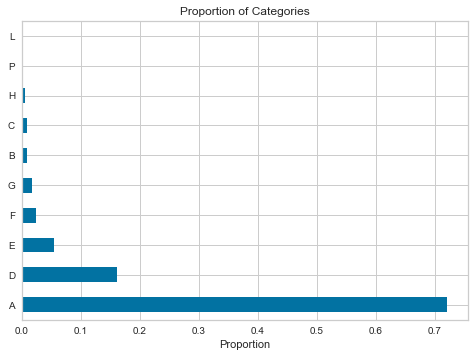

In [ ]:
plot_proportion_category(df, 'reserved_room_type')

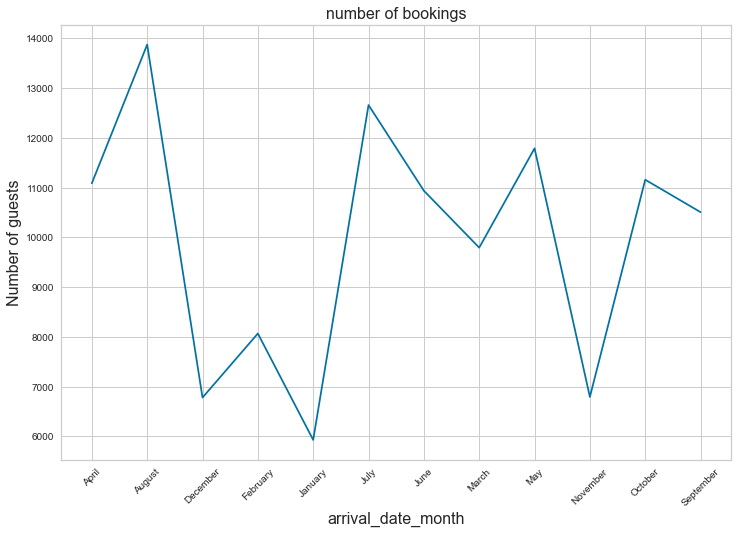

In [ ]:
plot_counts_in_time(df, "arrival_date_month", "hotel", "number of bookings")

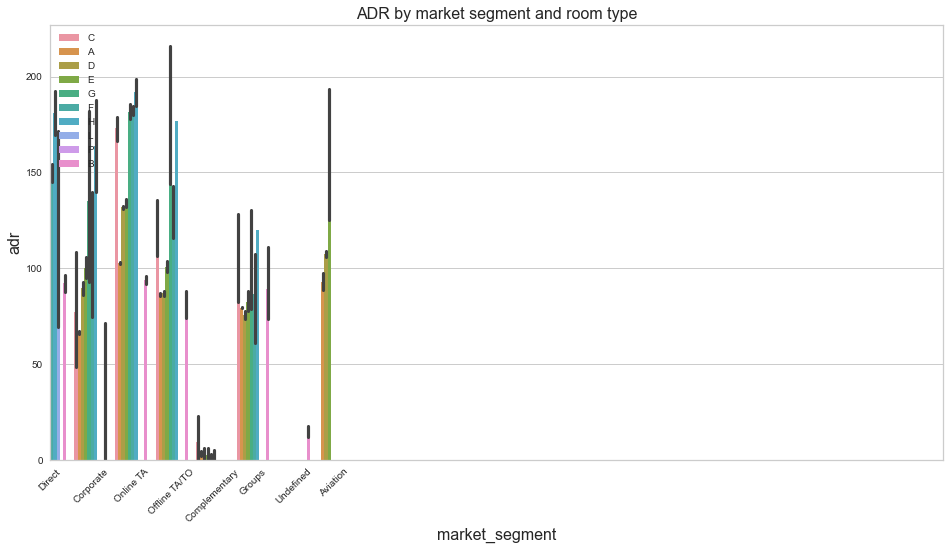

In [ ]:
plot_bars_three_features(df, "market_segment", "adr", "reserved_room_type", "ADR by market segment and room type")

/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


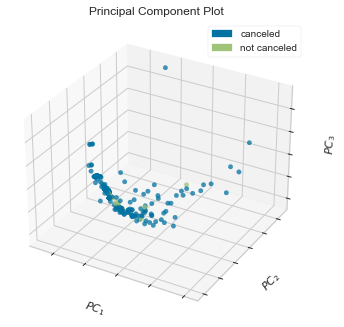

In [ ]:
pca_decompose(df, num_features, 'is_canceled', ['canceled', 'not canceled'])

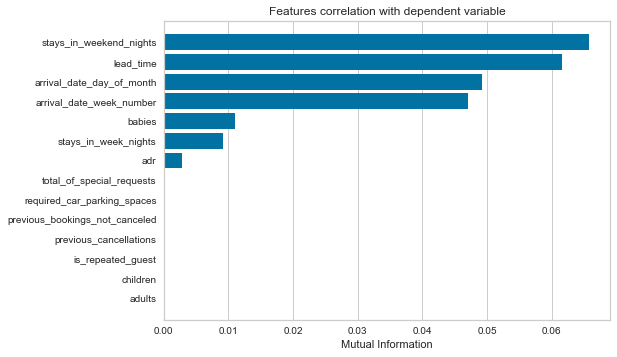

In [ ]:
display_feature_corr(df, 'is_canceled', num_features)

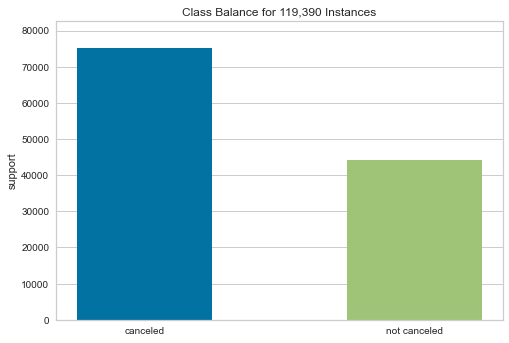

In [ ]:
display_target_balance(df, 'is_canceled', ['canceled', 'not canceled'])

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<AxesSubplot:>

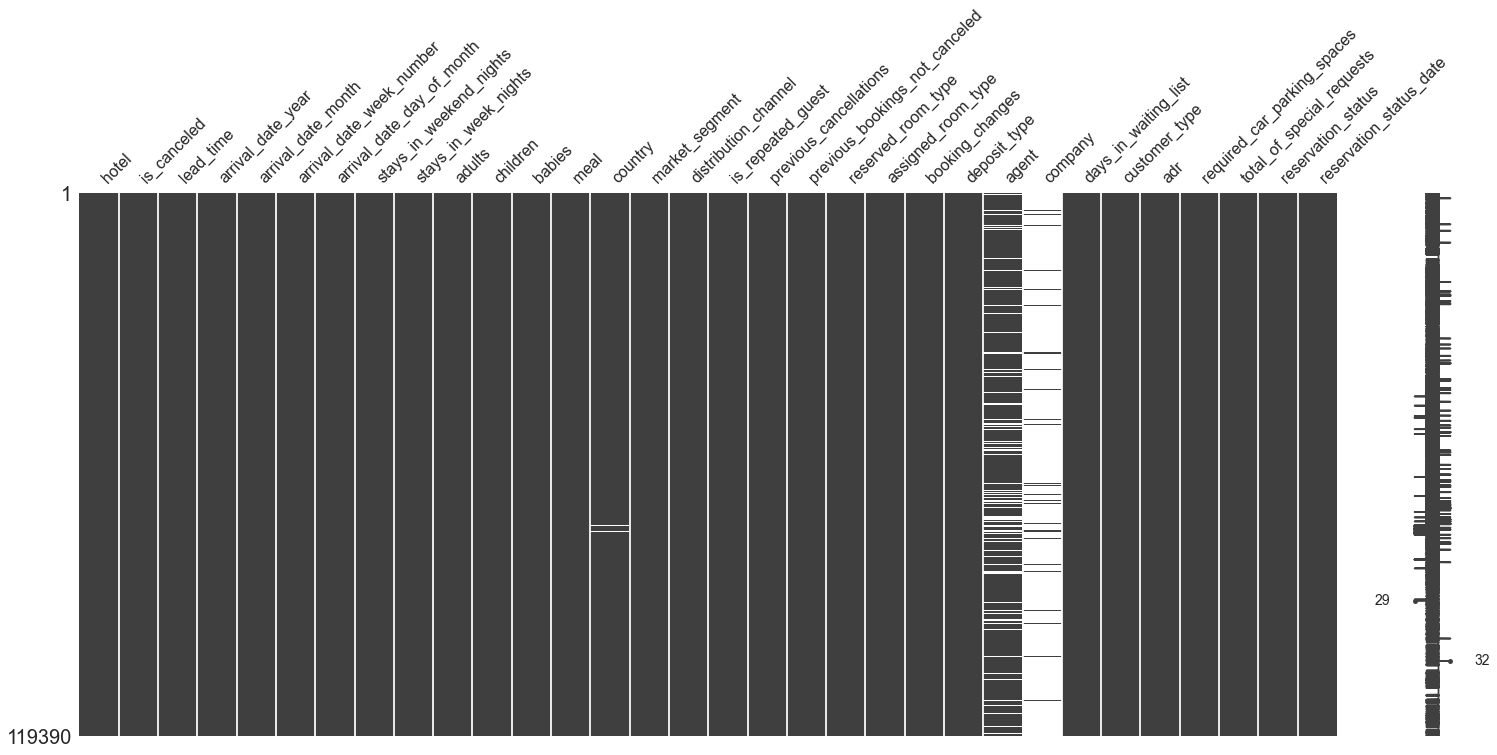

In [ ]:
import missingno as msno

msno.matrix(df.sort_values('is_canceled'))

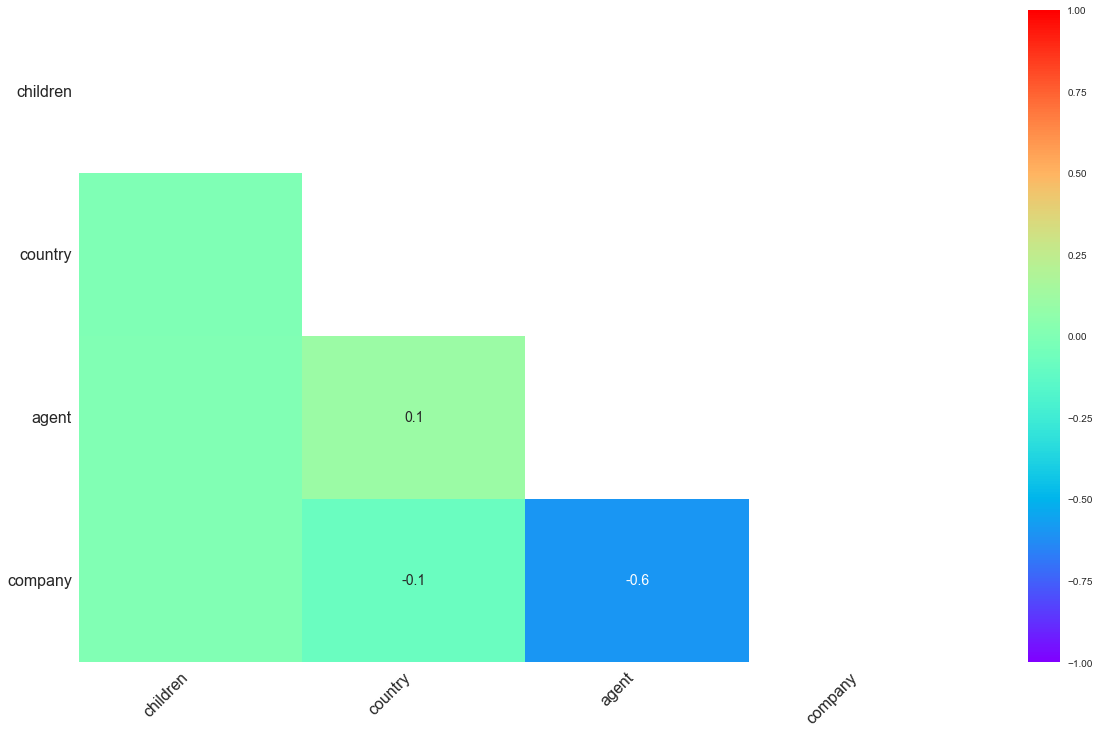

In [ ]:
msno.heatmap(df, cmap='rainbow');
#The correlation matrix of missingness shows that most nulls 
# in agent are associated with nulls in rating and company

In [ ]:
target_feature = 'is_cancelled'
category_features = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'reservation_status', 'deposit_type', 'customer_type']
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

In [ ]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype('category')
df[category_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   hotel                 119390 non-null  object  
 1   arrival_date_month    119390 non-null  object  
 2   meal                  119390 non-null  object  
 3   country               118902 non-null  object  
 4   market_segment        119390 non-null  object  
 5   distribution_channel  119390 non-null  object  
 6   is_repeated_guest     119390 non-null  category
 7   reserved_room_type    119390 non-null  object  
 8   reservation_status    119390 non-null  object  
 9   deposit_type          119390 non-null  object  
 10  customer_type         119390 non-null  object  
dtypes: category(1), object(10)
memory usage: 9.2+ MB


In [ ]:
df.isnull().sum()
#throw out company ( a lot of) children KNN imputer, country - mode, agent the same

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# prepare taemplate for custom function for apply method
def get_quartile(value):
    if value == "December" or value == "January" or value == "February":
        return 1
    if value == "May" or value == "March" or value == "April":
        return 3    
    if value == "July" or value == "June" or value == "August":
        return 3
    if value == "September" or value == "November" or value == "October":
        return 4    

In [ ]:
def has_weekend(value):
    if value > 0:
        return 1
    else:
        return 0    

In [ ]:
def date_of_cancellation(row):

In [ ]:
def date_of_checkout(row):
    

In [ ]:
df['quartile'] = df['arrival_date_month'].apply(lambda value: get_quartile(value), axis=1)
#maybe it is not needed???
df['has_weekend'] = df['stays_in_weekend_nights'].apply(lambda value: has_weekend(value), axis=1)


In [ ]:
#Date at which the last status was set.
#This variable can be used in conjunction with the ReservationStatus
#to understand when was the 
#booking canceled or when did the customer checked-out of the hotel

In [ ]:
# encode category variables
# but for random forest it is not needed 

In [ ]:
pip install shap

     |███                             | 40 kB 9.7 kB/s eta 0:00:41ERROR: Exception:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/anaconda3/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/opt/anaconda3/lib/python3.9/http/client.py", line 462, in read
    n = self.readinto(b)
  File "/opt/anaconda3/lib/python3.9/http/client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "/opt/anaconda3/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "/opt/anaconda3/lib/python3.9/ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "/opt/anaconda3/lib/python3.9/ssl.py"